In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

(-0.5, 1.5)

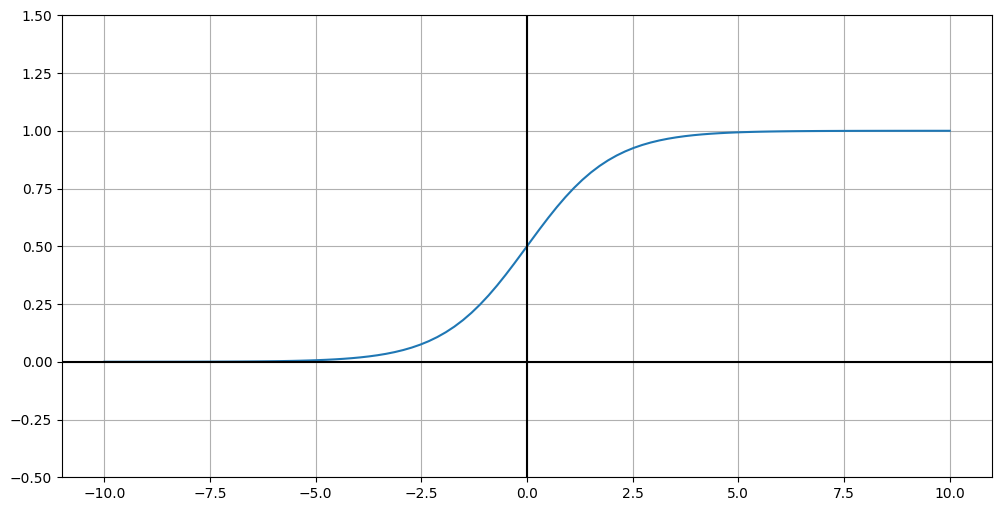

In [3]:
vals = np.linspace(-10, 10 , num = 100, dtype = np.float32)
activation = sigmoid(vals)
fig = plt.figure(figsize = (12, 6))
plt.plot(vals, activation)
plt.grid(True, which = 'both')
plt.axhline(y = 0, color = 'k')
plt.axvline(x = 0, color = 'k')
plt.yticks()
plt.ylim([-0.5, 1.5])

In [4]:
def logic_gate(w1, w2, b):
  return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)

def test(gate):
  for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
    print(
        "{}, {}: {}".format(a, b, np.round(gate(a, b)))
      )

In [5]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


In [6]:
or_gate = logic_gate(15, 15, -20)
test(or_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


In [7]:
W_1 = np.array([[2, -1, 1, 4], [-1, 2, -3, 1], [3, -2, -1, 5]])
W_1

array([[ 2, -1,  1,  4],
       [-1,  2, -3,  1],
       [ 3, -2, -1,  5]])

In [8]:
W_2 = np.array([[3, 1, -2, 1], [-2, 4, 1, -4], [-1, -3, 2, -5], [3, 1, 1, 1]])
W_3 = np.array([[-1, 3, -2], [1, -1, -3], [3, -2, 2], [1, 2, 1]])

In [9]:
x_in = np.array([.5, .8, .2])
x_in

array([0.5, 0.8, 0.2])

In [10]:
x_mat_in  = np.array([[.5, .8, .2], [.1, .9, .6], [.2, .2, .3], [.6, .1, .9], [.5, .5, .4], [.9, .1, .9], [.1, .8, .7], [.9, .9, .1]])
x_mat_in

array([[0.5, 0.8, 0.2],
       [0.1, 0.9, 0.6],
       [0.2, 0.2, 0.3],
       [0.6, 0.1, 0.9],
       [0.5, 0.5, 0.4],
       [0.9, 0.1, 0.9],
       [0.1, 0.8, 0.7],
       [0.9, 0.9, 0.1]])

In [14]:
def soft_max_vec(vec):
  return np.exp(vec) / np.sum(np.exp(vec))

def soft_max_mat(mat):
  return np.exp(mat) / (np.sum(np.exp(mat), axis = 1).reshape(-1, 1))

In [15]:
def layer(W, x_in):
  return sigmoid(np.dot(x_in, W))

def multilayer(W1, W2, W3, x_in):
  layer1_out = layer(W1, x_in)
  layer2_out = layer(W2, layer1_out)
  return np.dot(layer2_out, W3)

out = multilayer(W_1, W_2, W_3, x_in)
print(out)
out_mat = multilayer(W_1, W_2, W_3, x_mat_in)
print(out_mat)
print(soft_max_vec(out))
print(soft_max_mat(out_mat))

[ 2.04146788  1.04718238 -3.47867612]
[[ 2.04146788  1.04718238 -3.47867612]
 [ 1.92205929  1.42324752 -3.54057369]
 [ 1.9563182   1.13151906 -3.27363361]
 [ 1.63308573  2.17592794 -2.97738636]
 [ 1.84869797  1.55211843 -3.46934914]
 [ 1.59253551  2.05871663 -2.82613226]
 [ 1.8430245   1.73746743 -3.5474088 ]
 [ 1.96268542  1.10966666 -3.54194982]]
[0.72780576 0.26927918 0.00291506]
[[0.72780576 0.26927918 0.00291506]
 [0.62054212 0.37682531 0.00263257]
 [0.69267581 0.30361576 0.00370844]
 [0.36618794 0.63016955 0.00364252]
 [0.57199769 0.4251982  0.00280411]
 [0.38373781 0.61163804 0.00462415]
 [0.52510443 0.4725011  0.00239447]
 [0.69920561 0.29795012 0.00284428]]
